In [2]:
# This notebook is intended to be the documentation for completed tasks. 
# It runs code that we've written and makes plots showing results. 

In [64]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import polars as pl
from pathlib import Path
import matplotlib.pyplot as plt
import andrewFunctions as nfldf
import fileManagement as fm
import basicFunctions as bf

In [3]:
games, players, plays, pffData = fm.loadData()
weekData = fm.loadWeek()

In [4]:
playWeek = fm.playWeek(games, plays)

In [52]:
# Code to identify target Receiver
itrOutputs = nfldf.identifyTargetReceiver(weekData[0],plays,playWeek,weekId=1)
receiverName, validPlay, descName, receiverDistance, \
receiverNextClosestDistance, receiverSeparation, nonReceiverSeparation, qbNflID = itrOutputs

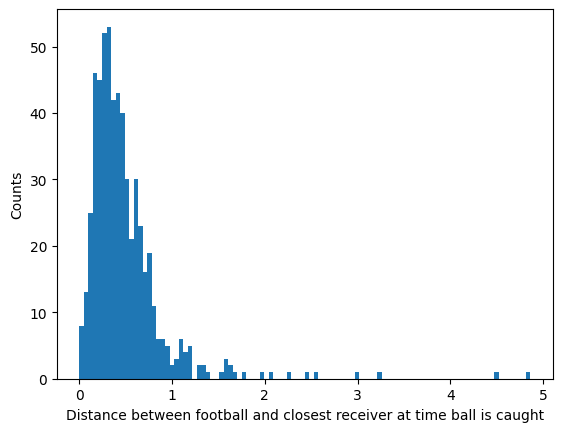

In [53]:
plt.hist(receiverDistance,100)
plt.xlabel("Distance between football and closest receiver at time ball is caught")
plt.ylabel("Counts")
plt.show()

This result surprises me! Maybe 'high-value' throws are often made to receivers that are close to defenders?

I wonder if there's a correlation between:
    1. the distance between a receiver and the closest defender
    2. the distance the ball is thrown.



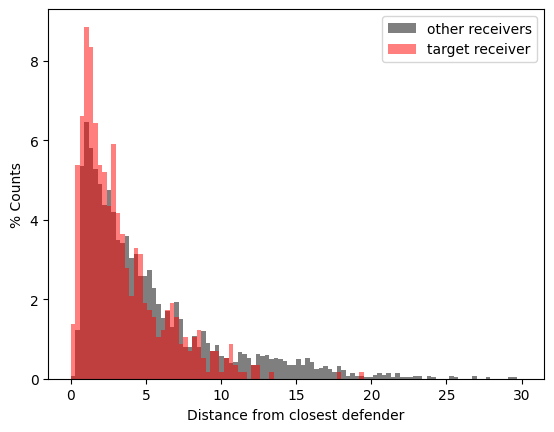

In [91]:
numBins = 100
maxBin = np.maximum(np.max(nonReceiverSeparation[~np.isnan(nonReceiverSeparation)]), np.max(receiverSeparation))
bins = np.linspace(0, np.ceil(maxBin), numBins+1)
binWidth = bins[1]-bins[0]

nonSepCounts = np.histogram(nonReceiverSeparation[~np.isnan(nonReceiverSeparation)].flatten(), bins)[0]
recSepCounts = np.histogram(receiverSeparation, bins)[0]

plt.bar(bf.edge2center(bins), nonSepCounts/np.sum(nonSepCounts)*100, color='k', alpha=0.5, width=binWidth, label='other receivers')
plt.bar(bf.edge2center(bins), recSepCounts/np.sum(recSepCounts)*100, color='r', alpha=0.5, width=binWidth, label='target receiver')
plt.xlabel('Distance from closest defender')
plt.ylabel('% Counts')
plt.legend()


print("This result surprises me! Maybe 'high-value' throws are often made to receivers that are close to defenders?\n")
print("I wonder if there's a correlation between:")
print("    1. the distance between a receiver and the closest defender")
print("    2. the distance the ball is thrown.\n")
plt.show()

